In [67]:
import sys
sys.path.append('../')

%load_ext autoreload
%autoreload 2

from src.BO_trial_new import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
INPUT_RANGES = {"x": ["uniform", [0.0, 1.0]], "iteration_fidelity": ["uniform", [0.25, 1]]}

MULTIFIDELITY_PARAMS = {
    # which dimension of the input is for fidelity
    "fidelity_dim": 1,
    # key = fidelity_dim, value = target fidelity we want to optimize at
    "target_fidelities": {1: 1.0, 2: 0.0},
    # key = fidelity_dim, value = the increase in cost per one unit of fidelity
    "fidelity_weights": {1: 1.0},
    # fixed cost of evaluation; cost of evaluating at fidelity s = fixed_cost + fidelity_weights value * s \propto s
    "fixed_cost": 0.0,
}

tkwargs = {
    "dtype": torch.double,
    "device": torch.device("cpu"),  # torch.device("cuda" if torch.cuda.is_available() else "cpu"),
}

# fidelity values at which to save intermediate outputs
CHECKPOINT_FIDELITIES = [0.25, 0.5, 1]
num_checkpoints = len(CHECKPOINT_FIDELITIES)


In [62]:
def problem_evaluate(X: torch.Tensor, checkpoint_fidelities: List, **tkwargs) -> torch.Tensor:
    """
    Evaluates synthetic multi-task multi-fidelity problem

    Args:
        X: `num_samples x input_dim` tensor
        checkpoint_fidelities: list of numbers between 0 and 1, which are fidelity values where we save intermediate outputs

    Returns:
        `num_samples x 2` tensor of outputs, where column 0 and 1 contain values for task 0 and 1, respectively
    """

    input_shape = X.shape
    outputs = []
    max_iters = 20

    for i in range(input_shape[0]):
        x = X[i][0].item()
        s = X[i][1].item()
        y = 1 - (x - 0.5) ** 2

        checkpoints = []
        for frac_fid in checkpoint_fidelities:
            checkpoints.append(int(max_iters * s * frac_fid))

        for checkpoint in checkpoints:
            print("evaluating at checkpoint {}".format(checkpoint))
            if checkpoint < max_iters - 1:
                task_1 = torch.randn(1)*0.1
            else:
                task_1 = torch.tensor([y])
            task_0 = torch.tensor([y])

            outputs.append(torch.cat((task_1, task_0)))

    return torch.stack(outputs).to(**tkwargs)

In [69]:
def problem_evaluate_ST(X: torch.Tensor, checkpoint_fidelities: List, **tkwargs) -> torch.Tensor:
    """
    Evaluates synthetic multi-task multi-fidelity problem

    Args:
        X: `num_samples x input_dim` tensor
        checkpoint_fidelities: list of numbers between 0 and 1, which are fidelity values where we save intermediate outputs

    Returns:
        `num_samples x 2` tensor of outputs, where column 0 and 1 contain values for task 0 and 1, respectively
    """

    input_shape = X.shape
    outputs = []
    max_iters = 20

    for i in range(input_shape[0]):
        x = X[i][0].item()
        s = X[i][1].item()
        y = 1 - (x - 0.5) ** 2

        checkpoints = []
        for frac_fid in checkpoint_fidelities:
            checkpoints.append(int(max_iters * s * frac_fid))

        for checkpoint in checkpoints:
            print("evaluating at checkpoint {}".format(checkpoint))
            if checkpoint < max_iters - 1:
                task_1 = torch.randn(1)*0.1
            else:
                task_1 = torch.tensor([y])
            # task_0 = torch.tensor([y])

            outputs.append(task_1)

    return torch.stack(outputs).to(**tkwargs)

results folder /home/yz685/anaconda3/envs/SGD_diagnostics/lib/python3.9/site-packages/
initial_X = tensor([[0.4963, 0.7256],
        [0.7682, 0.6176],
        [0.0885, 0.9223],
        [0.1320, 0.5917],
        [0.3074, 0.7242]])
evaluating at checkpoint 3
evaluating at checkpoint 7
evaluating at checkpoint 14
evaluating at checkpoint 3
evaluating at checkpoint 6
evaluating at checkpoint 12
evaluating at checkpoint 4
evaluating at checkpoint 9
evaluating at checkpoint 18
evaluating at checkpoint 2
evaluating at checkpoint 5
evaluating at checkpoint 11
evaluating at checkpoint 3
evaluating at checkpoint 7
evaluating at checkpoint 14
fidelity checkpoints tensor([[0.1814],
        [0.3628],
        [0.7256],
        [0.1544],
        [0.3088],
        [0.6176],
        [0.2306],
        [0.4612],
        [0.9223],
        [0.1479],
        [0.2959],
        [0.5917],
        [0.1811],
        [0.3621],
        [0.7242]])
starting BO iteration  1
Fitting GP model on torch.Size([30, 3]) and

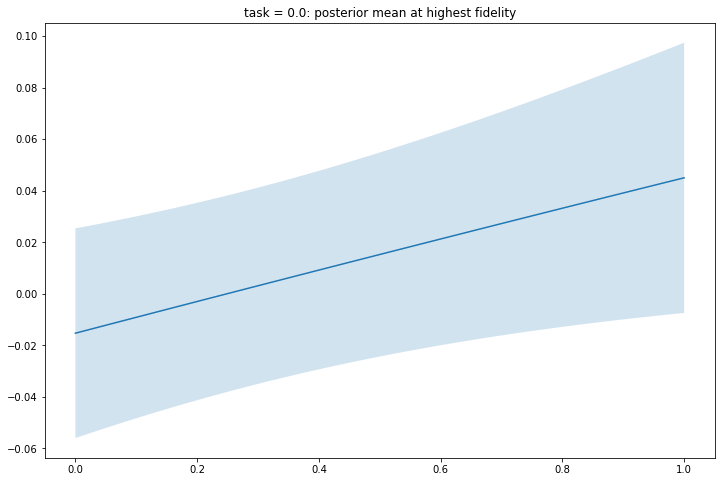

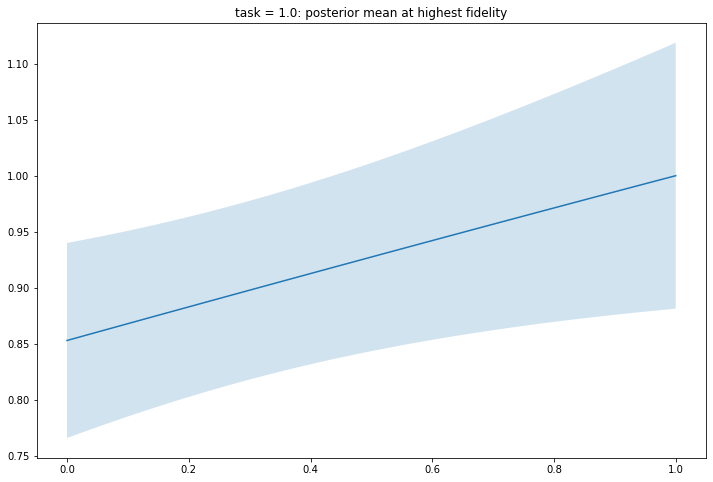

current max posterior mean before sampling new points: 0.04500994103116407
optimize MultiFidelityKG, get candidates  tensor([[1.0000, 0.9992, 0.0000]], dtype=torch.float64) , acqf_val  tensor([2.2818e-06], dtype=torch.float64)
evaluating at checkpoint 4
evaluating at checkpoint 9
evaluating at checkpoint 19
evaluation of newly sampled point tensor([[-0.0106,  0.7500],
        [-0.0932,  0.7500],
        [ 0.7500,  0.7500]])
fidelity checkpoints tensor([[0.2498],
        [0.4996],
        [0.9992]], dtype=torch.float64)
Finished iteration 1, best value so far is 0.75
starting BO iteration  2
Fitting GP model on torch.Size([36, 3]) and torch.Size([36, 1]).


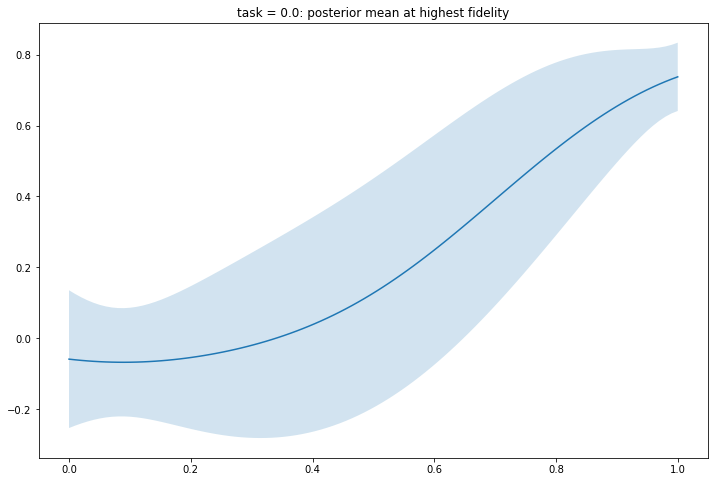

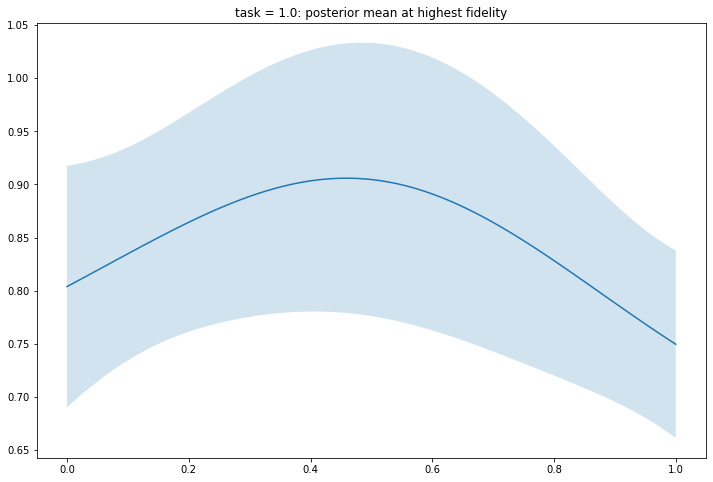

current max posterior mean before sampling new points: 0.7372711362628799
optimize MultiFidelityKG, get candidates  tensor([[0.7757, 0.9926, 0.0000]], dtype=torch.float64) , acqf_val  tensor([0.0023], dtype=torch.float64)
evaluating at checkpoint 4
evaluating at checkpoint 9
evaluating at checkpoint 19
evaluation of newly sampled point tensor([[ 0.1059,  0.9240],
        [-0.0836,  0.9240],
        [ 0.9240,  0.9240]])
fidelity checkpoints tensor([[0.2482],
        [0.4963],
        [0.9926]], dtype=torch.float64)
Finished iteration 2, best value so far is 0.9239779710769653
starting BO iteration  3
Fitting GP model on torch.Size([42, 3]) and torch.Size([42, 1]).


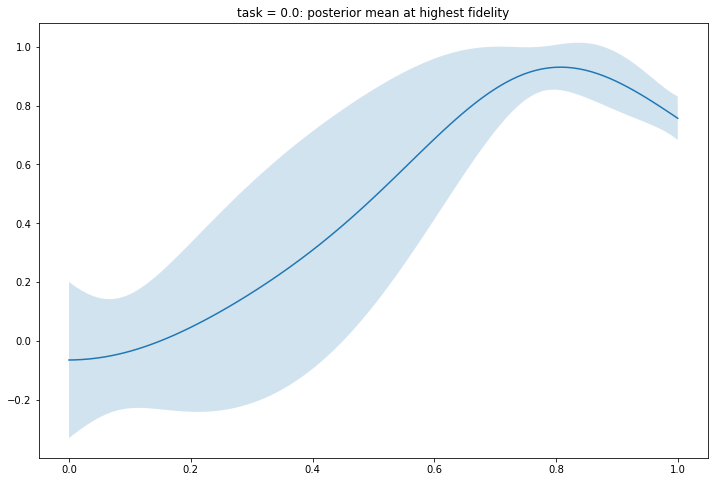

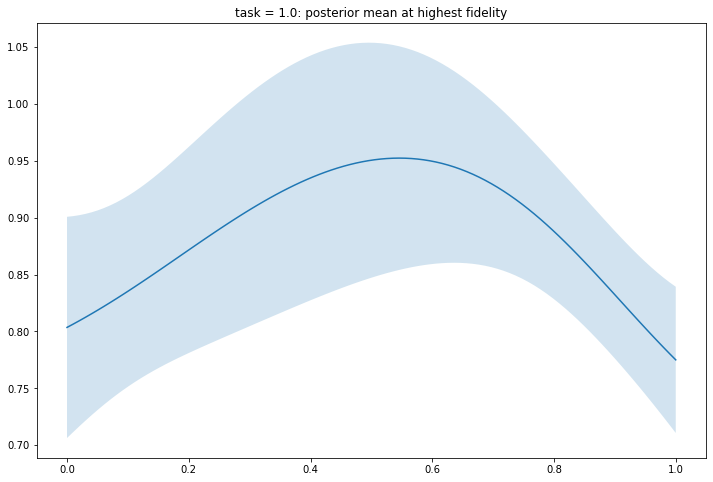

current max posterior mean before sampling new points: 0.9307383797027363
optimize MultiFidelityKG, get candidates  tensor([[0.6386, 0.9918, 1.0000]], dtype=torch.float64) , acqf_val  tensor([0.0089], dtype=torch.float64)
evaluating at checkpoint 4
evaluating at checkpoint 9
evaluating at checkpoint 19
evaluation of newly sampled point tensor([[0.0734, 0.9808],
        [0.0266, 0.9808],
        [0.9808, 0.9808]])
fidelity checkpoints tensor([[0.2479],
        [0.4959],
        [0.9918]], dtype=torch.float64)
Finished iteration 3, best value so far is 0.980782687664032
starting BO iteration  4
Fitting GP model on torch.Size([48, 3]) and torch.Size([48, 1]).


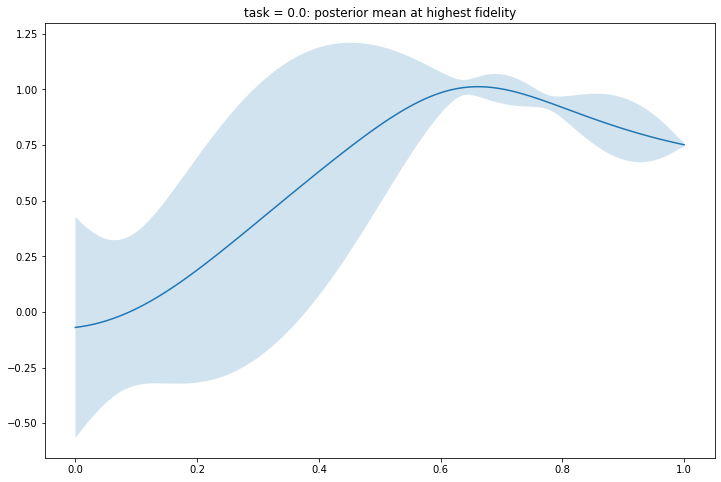

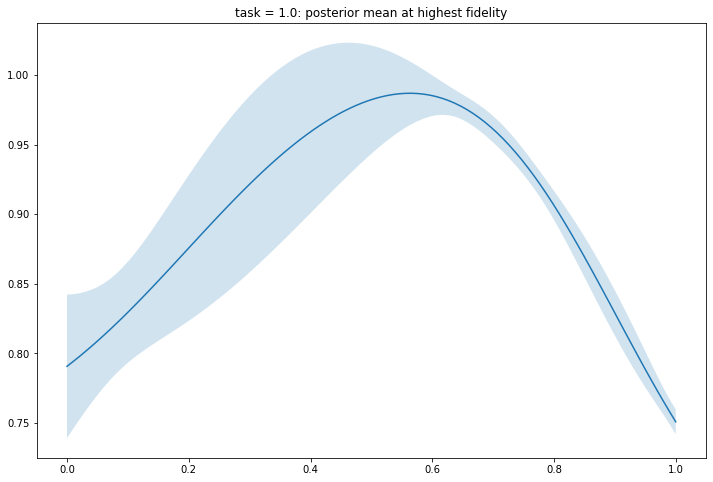

current max posterior mean before sampling new points: 1.0123163150290353
optimize MultiFidelityKG, get candidates  tensor([[0.5200, 0.9911, 0.0000]], dtype=torch.float64) , acqf_val  tensor([0.0240], dtype=torch.float64)
evaluating at checkpoint 4
evaluating at checkpoint 9
evaluating at checkpoint 19
evaluation of newly sampled point tensor([[0.0497, 0.9996],
        [0.0668, 0.9996],
        [0.9996, 0.9996]])
fidelity checkpoints tensor([[0.2478],
        [0.4956],
        [0.9911]], dtype=torch.float64)
Finished iteration 4, best value so far is 0.9996009469032288
starting BO iteration  5
Fitting GP model on torch.Size([54, 3]) and torch.Size([54, 1]).


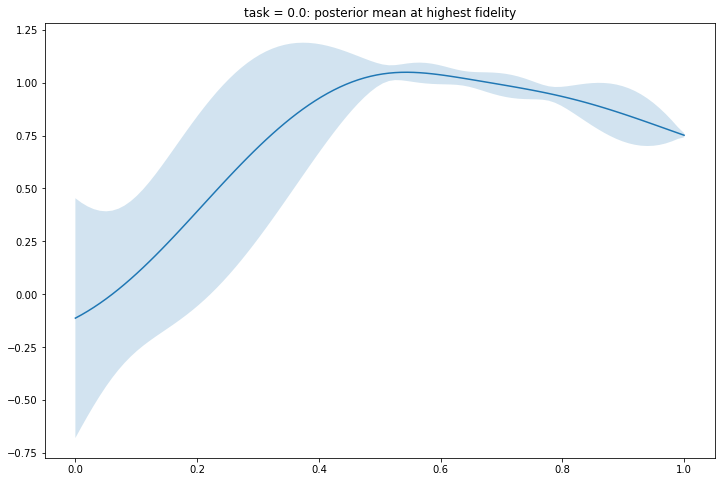

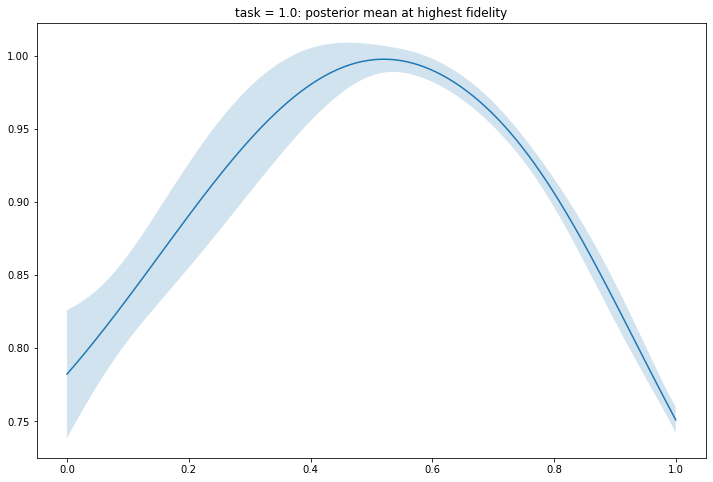

current max posterior mean before sampling new points: 1.0491804402185985
optimize MultiFidelityKG, get candidates  tensor([[0.4214, 0.9918, 1.0000]], dtype=torch.float64) , acqf_val  tensor([0.0166], dtype=torch.float64)
evaluating at checkpoint 4
evaluating at checkpoint 9
evaluating at checkpoint 19
evaluation of newly sampled point tensor([[-0.0375,  0.9938],
        [ 0.1201,  0.9938],
        [ 0.9938,  0.9938]])
fidelity checkpoints tensor([[0.2480],
        [0.4959],
        [0.9918]], dtype=torch.float64)
Finished iteration 5, best value so far is 0.9996009469032288


In [64]:
output_MTMF = run_BO(
    problem_evaluate=problem_evaluate,
    param_ranges=deepcopy(INPUT_RANGES),
    n_initial_pts=5,
    n_bo_iter=5,
    trial=0,
    multifidelity_params=MULTIFIDELITY_PARAMS,
    checkpoint_fidelities=CHECKPOINT_FIDELITIES,
    **tkwargs
)

In [12]:
output['X'][5::6]

tensor([[0.4963, 0.7256, 1.0000],
        [0.7682, 0.6176, 1.0000],
        [0.0885, 0.9223, 1.0000],
        [0.1320, 0.5917, 1.0000],
        [0.3074, 0.7242, 1.0000],
        [1.0000, 0.9992, 1.0000],
        [0.7757, 0.9926, 1.0000],
        [0.6386, 0.9918, 1.0000],
        [0.5200, 0.9911, 1.0000],
        [0.4214, 0.9918, 1.0000]], dtype=torch.float64)

In [ ]:
# why are the acqf values so small?
# others to try, e.g., fidelity-augmented Hartmann 6?
# the other extreme of the same example: 
# make them perfectly correlated

results folder /home/yz685/anaconda3/envs/SGD_diagnostics/lib/python3.9/site-packages/
initial_X = tensor([[0.4963, 0.7256],
        [0.7682, 0.6176],
        [0.0885, 0.9223],
        [0.1320, 0.5917],
        [0.3074, 0.7242]])
evaluating at checkpoint 3
evaluating at checkpoint 7
evaluating at checkpoint 14
evaluating at checkpoint 3
evaluating at checkpoint 6
evaluating at checkpoint 12
evaluating at checkpoint 4
evaluating at checkpoint 9
evaluating at checkpoint 18
evaluating at checkpoint 2
evaluating at checkpoint 5
evaluating at checkpoint 11
evaluating at checkpoint 3
evaluating at checkpoint 7
evaluating at checkpoint 14
fidelity checkpoints tensor([[0.1814],
        [0.3628],
        [0.7256],
        [0.1544],
        [0.3088],
        [0.6176],
        [0.2306],
        [0.4612],
        [0.9223],
        [0.1479],
        [0.2959],
        [0.5917],
        [0.1811],
        [0.3621],
        [0.7242]])
starting BO iteration  1
Fitting GP model on torch.Size([15, 2]) and

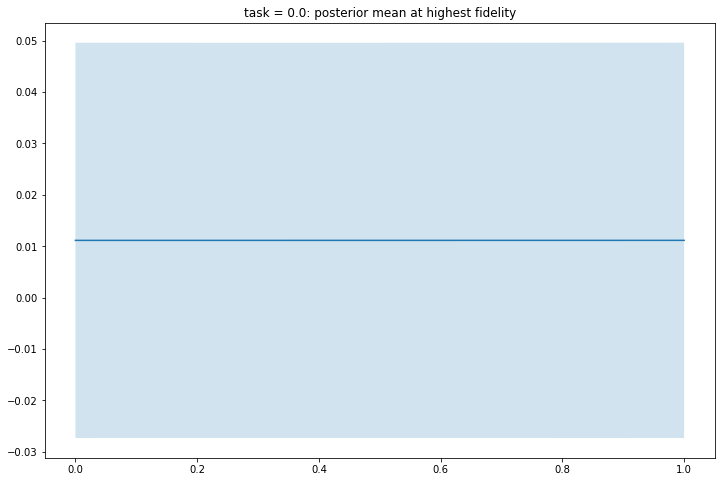

current max posterior mean before sampling new points: 0.011141149205051281
optimize MultiFidelityKG, get candidates  tensor([[0.6360, 0.2500]], dtype=torch.float64) , acqf_val  tensor([2.5273e-05], dtype=torch.float64)
evaluating at checkpoint 1
evaluating at checkpoint 2
evaluating at checkpoint 5
evaluation of newly sampled point tensor([[-0.0671],
        [ 0.1239],
        [ 0.1622]])
fidelity checkpoints tensor([[0.0625],
        [0.1250],
        [0.2500]], dtype=torch.float64)
Finished iteration 1, best value so far is 0.16223309934139252
starting BO iteration  2
Fitting GP model on torch.Size([18, 2]) and torch.Size([18, 1]).


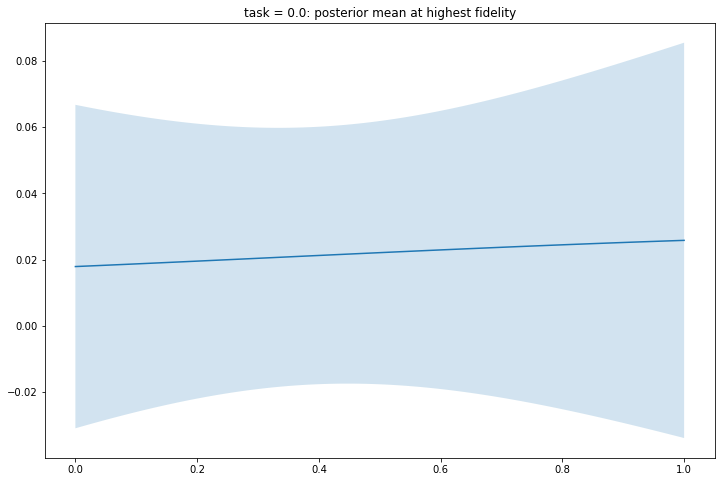

current max posterior mean before sampling new points: 0.02581025036924184
optimize MultiFidelityKG, get candidates  tensor([[1.0000, 0.2500]], dtype=torch.float64) , acqf_val  tensor([4.2567e-05], dtype=torch.float64)
evaluating at checkpoint 1
evaluating at checkpoint 2
evaluating at checkpoint 5
evaluation of newly sampled point tensor([[ 0.2265],
        [ 0.0366],
        [-0.0044]])
fidelity checkpoints tensor([[0.0625],
        [0.1250],
        [0.2500]], dtype=torch.float64)
Finished iteration 2, best value so far is 0.16223309934139252
starting BO iteration  3
Fitting GP model on torch.Size([21, 2]) and torch.Size([21, 1]).


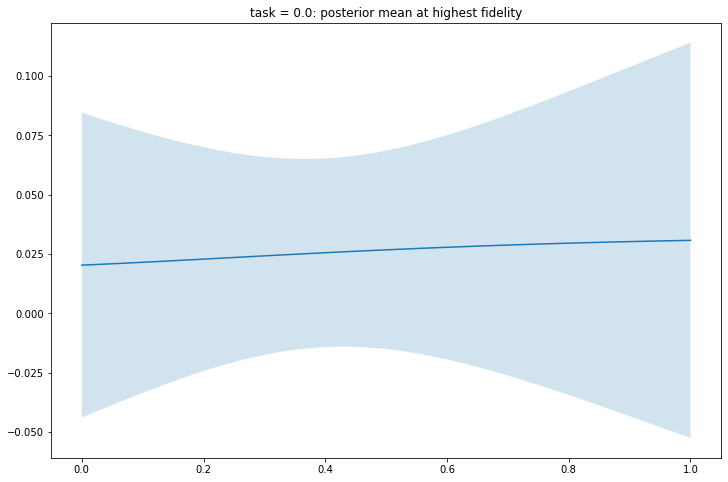

current max posterior mean before sampling new points: 0.030712041722731814
optimize MultiFidelityKG, get candidates  tensor([[0.0000, 0.9255]], dtype=torch.float64) , acqf_val  tensor([-5.3645e-06], dtype=torch.float64)
evaluating at checkpoint 4
evaluating at checkpoint 9
evaluating at checkpoint 18
evaluation of newly sampled point tensor([[ 0.0521],
        [-0.0303],
        [ 0.1280]])
fidelity checkpoints tensor([[0.2314],
        [0.4628],
        [0.9255]], dtype=torch.float64)
Finished iteration 3, best value so far is 0.16223309934139252
starting BO iteration  4
Fitting GP model on torch.Size([24, 2]) and torch.Size([24, 1]).


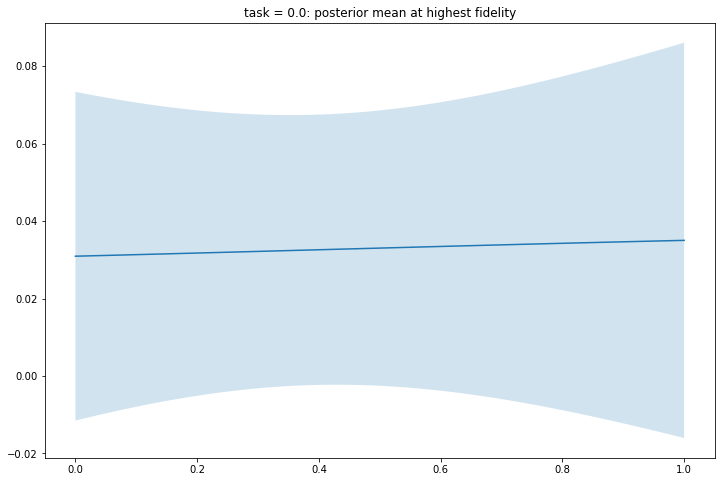

current max posterior mean before sampling new points: 0.03500791070307603
optimize MultiFidelityKG, get candidates  tensor([[0., 1.]], dtype=torch.float64) , acqf_val  tensor([-2.9054e-06], dtype=torch.float64)
evaluating at checkpoint 5
evaluating at checkpoint 10
evaluating at checkpoint 20
evaluation of newly sampled point tensor([[-0.0248],
        [ 0.0143],
        [ 0.7500]])
fidelity checkpoints tensor([[0.2500],
        [0.5000],
        [1.0000]], dtype=torch.float64)
Finished iteration 4, best value so far is 0.75
starting BO iteration  5
Fitting GP model on torch.Size([27, 2]) and torch.Size([27, 1]).


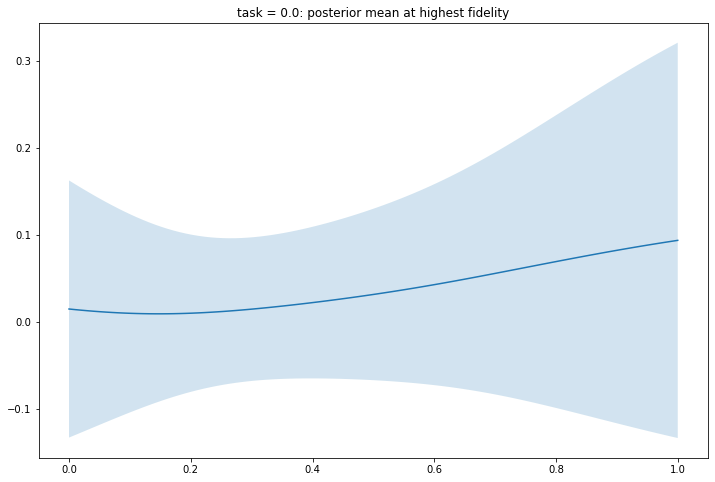

current max posterior mean before sampling new points: 0.1939322126845226
optimize MultiFidelityKG, get candidates  tensor([[1., 1.]], dtype=torch.float64) , acqf_val  tensor([0.0002], dtype=torch.float64)
evaluating at checkpoint 5
evaluating at checkpoint 10
evaluating at checkpoint 20
evaluation of newly sampled point tensor([[-0.0183],
        [-0.1384],
        [ 0.7500]])
fidelity checkpoints tensor([[0.2500],
        [0.5000],
        [1.0000]], dtype=torch.float64)
Finished iteration 5, best value so far is 0.75


In [65]:
output_STMF = run_BO(
    problem_evaluate=problem_evaluate_ST,
    param_ranges=deepcopy(INPUT_RANGES),
    n_initial_pts=5,
    n_bo_iter=5,
    trial=0,
    multifidelity_params=MULTIFIDELITY_PARAMS,
    checkpoint_fidelities=CHECKPOINT_FIDELITIES,
    **tkwargs
)

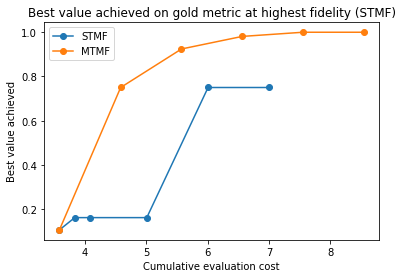

In [66]:
plt.plot(output_STMF['cum_costs'], output_STMF['best_so_far'], '-o', label = 'STMF')
plt.plot(output_MTMF['cum_costs'], output_MTMF['best_so_far'], '-o', label = "MTMF")

plt.xlabel('Cumulative evaluation cost')
plt.ylabel('Best value achieved')
plt.title('Best value achieved on gold metric at highest fidelity (STMF)')
plt.legend()

In [ ]:
# when I have multiple trials, what I need to do:\
# average the cost 
# average the best values
# plot avg_cost vs avg_best_value

In [111]:
output_MTMF_l = []
output_STMF_l = []

for trial in range(6):

    output_MTMF = run_BO(
        problem_evaluate=problem_evaluate,
        param_ranges=deepcopy(INPUT_RANGES),
        n_initial_pts=5,
        n_bo_iter=5,
        trial=trial,
        multifidelity_params=MULTIFIDELITY_PARAMS,
        checkpoint_fidelities=CHECKPOINT_FIDELITIES,
        **tkwargs
    )

    output_STMF = run_BO(
        problem_evaluate=problem_evaluate_ST,
        param_ranges=deepcopy(INPUT_RANGES),
        n_initial_pts=5,
        n_bo_iter=5,
        trial=trial,
        multifidelity_params=MULTIFIDELITY_PARAMS,
        checkpoint_fidelities=CHECKPOINT_FIDELITIES,
        **tkwargs
    )

    output_MTMF_l.append(output_MTMF)
    output_STMF_l.append(output_STMF)


results folder /home/yz685/anaconda3/envs/SGD_diagnostics/lib/python3.9/site-packages/
initial_X = tensor([[0.4963, 0.7256],
        [0.7682, 0.6176],
        [0.0885, 0.9223],
        [0.1320, 0.5917],
        [0.3074, 0.7242]])
evaluating at checkpoint 3
evaluating at checkpoint 7
evaluating at checkpoint 14
evaluating at checkpoint 3
evaluating at checkpoint 6
evaluating at checkpoint 12
evaluating at checkpoint 4
evaluating at checkpoint 9
evaluating at checkpoint 18
evaluating at checkpoint 2
evaluating at checkpoint 5
evaluating at checkpoint 11
evaluating at checkpoint 3
evaluating at checkpoint 7
evaluating at checkpoint 14
fidelity checkpoints tensor([[0.1814],
        [0.3628],
        [0.7256],
        [0.1544],
        [0.3088],
        [0.6176],
        [0.2306],
        [0.4612],
        [0.9223],
        [0.1479],
        [0.2959],
        [0.5917],
        [0.1811],
        [0.3621],
        [0.7242]])
starting BO iteration  1
Fitting GP model on torch.Size([30, 3]) and

In [112]:
cost_MTMF = [output_MTMF['cum_costs'] for output_MTMF in output_MTMF_l]
best_val_MTMF = [output_MTMF['best_so_far'].squeeze(1).tolist() for output_MTMF in output_MTMF_l]

cost_STMF = [output_STMF['cum_costs'] for output_STMF in output_STMF_l]
best_val_STMF = [output_STMF['best_so_far'].squeeze(1).tolist() for output_STMF in output_STMF_l]

Text(0, 0.5, 'Best value achieved')

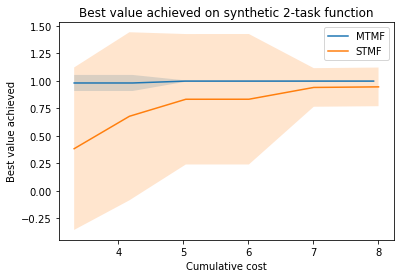

In [115]:
plt.plot(np.mean(cost_MTMF, axis = 0), np.mean(best_val_MTMF, axis = 0), label = 'MTMF')
plt.fill_between(
    np.mean(cost_MTMF, axis = 0), 
    np.mean(best_val_MTMF, axis = 0) + 1.96 * np.std(best_val_MTMF, axis = 0), 
    np.mean(best_val_MTMF, axis = 0) - 1.96 * np.std(best_val_MTMF, axis = 0),
    alpha = 0.2)

plt.plot(np.mean(cost_STMF, axis = 0), np.mean(best_val_STMF, axis = 0), label = 'STMF')
plt.fill_between(
    np.mean(cost_STMF, axis = 0), 
    np.mean(best_val_STMF, axis = 0) + 1.96 * np.std(best_val_STMF, axis = 0), 
    np.mean(best_val_STMF, axis = 0) - 1.96 * np.std(best_val_STMF, axis = 0),
    alpha = 0.2)

plt.legend()
plt.title('Best value achieved on synthetic 2-task function')
plt.xlabel('Cumulative cost')
plt.ylabel('Best value achieved')

In [ ]:
def plot_performance()

In [56]:
output_STMF['X'][2::3]

tensor([[0.4963, 0.7256],
        [0.7682, 0.6176],
        [0.0885, 0.9223],
        [0.1320, 0.5917],
        [0.3074, 0.7242],
        [0.6360, 0.2500],
        [1.0000, 0.2500],
        [0.0000, 0.9255],
        [0.0000, 1.0000],
        [1.0000, 1.0000]], dtype=torch.float64)

In [54]:
output_MTMF['X'][5::6]

tensor([[0.4963, 0.7256, 1.0000],
        [0.7682, 0.6176, 1.0000],
        [0.0885, 0.9223, 1.0000],
        [0.1320, 0.5917, 1.0000],
        [0.3074, 0.7242, 1.0000],
        [1.0000, 0.9992, 1.0000],
        [0.7757, 0.9926, 1.0000],
        [0.6386, 0.9918, 1.0000],
        [0.5200, 0.9911, 1.0000],
        [0.4214, 0.9918, 1.0000]], dtype=torch.float64)

In [57]:
output_STMF['acqf_vals']

tensor([ 2.5273e-05,  4.2567e-05, -5.3645e-06, -2.9054e-06,  2.1128e-04],
       dtype=torch.float64)

In [58]:
output_MTMF['acqf_vals']

tensor([2.2818e-06, 2.3050e-03, 8.9441e-03, 2.4020e-02, 1.6587e-02],
       dtype=torch.float64)